#### Business Goal

https://www.kaggle.com/shardulmehetar/vehicle-insurance-eda-modeling-top-6/notebook

Building a model to predict whether a customer would be interested in Vehicle insurance is extremely helpful for the compnay because
itcan then accordingly plan its communication strategy to rach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the custmer would be interested in Vehicle insurance, you have information about demographcs(gender, age, region code type),
Vehicles(vehicle age, Damage), Policy(Premimum, sourcing channel) etc.

#### What this notebook will cover

1. Exploratory data analysis

2. Modelling and Evaluation

In [1]:
#importing data manipulation libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score,classification_report

In [2]:
#Reading the train dataset
train = pd.read_csv('train.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


###### copying the train data into a variable through which we can perform operations.

In [3]:
df = train.copy()

In [4]:
df.shape

(381109, 12)

In [5]:
#checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

The dataset contains no null values

In [6]:
#Checking the statistical values of the dataset
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
#Checking general information on the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
# Number of columns and number of unique values present in it
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i}) --> {df[i].nunique()}')

columns and number of unique values
id) --> 381109
Gender) --> 2
Age) --> 66
Driving_License) --> 2
Region_Code) --> 53
Previously_Insured) --> 2
Vehicle_Age) --> 3
Vehicle_Damage) --> 2
Annual_Premium) --> 48838
Policy_Sales_Channel) --> 155
Vintage) --> 290
Response) --> 2


In [10]:
# Separating the Categorical data
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

### Exploratory Data analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

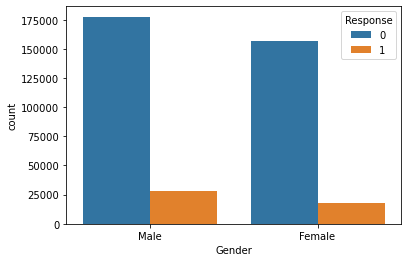

In [12]:
sns.countplot(data=df, x='Gender', hue='Response')

Count of gender with respect to the target variable: The number of responses from MALE is slighlty higher than that from FEMALE

<AxesSubplot:xlabel='Gender', ylabel='count'>

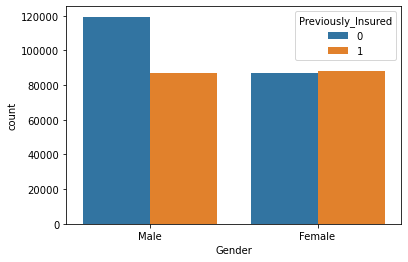

In [14]:
#Count of Gender with respect to the previously injured
sns.countplot(data=df, x='Gender', hue='Previously_Insured')

Response form MALE and FEMALE are the same for previously injured.

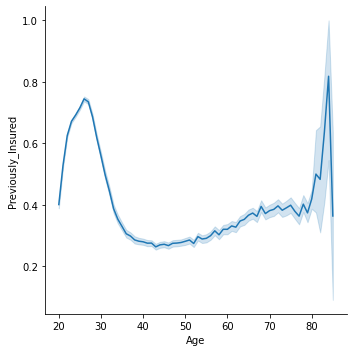

In [17]:
#Age vs Previously Injured
sns.relplot(data=df, x='Age', y='Previously_Insured', kind='line')

The cases of previously injured are quite high for the ages between 25-30,there is a reduction in the cases after 30 yrs then the cases begin going up steadily from the ages of 48 yrs.

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

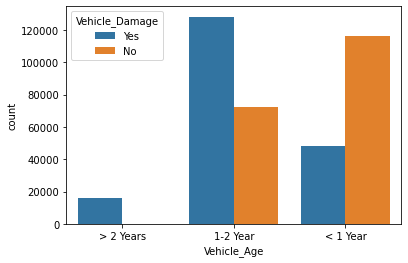

In [18]:
#Vehicle Age vs Vehicle Damage
sns.countplot(data=df, x='Vehicle_Age', hue='Vehicle_Damage')

-Most vehicles are damaged between their first and second years.

-Very low number of Vehicles of Ages 2 and above that are damaged.

/home/ochieng/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

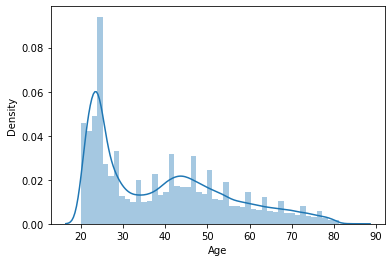

In [19]:
# Age distribution
sns.distplot(df['Age'])

Most car owners are between the ages of 20-30 according to this data.

The number of car owners dicreases with the increase in age.

In [20]:
#Gender vs Driving License
df = train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


More male than Females have driving licences.

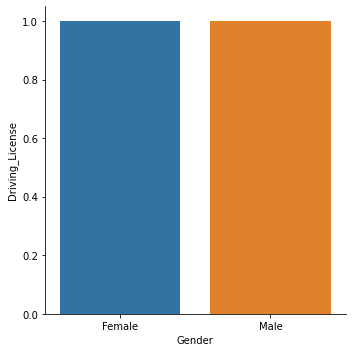

In [21]:
df = df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x='Gender',y="Driving_License",
           data=df, kind='bar')

In [22]:
#Count for Vehicle Age vs Response
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


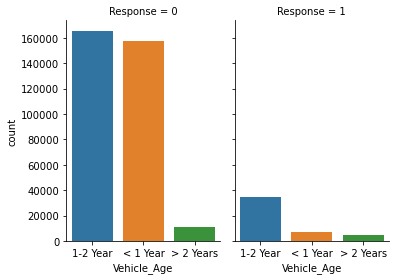

In [23]:
g = sns.catplot(x="Vehicle_Age", y="count", col="Response",
               data=df, kind="bar",
               height=4, aspect=.7);

Out of the responses, owners with vehicles of btwn 1-2 yrs had the highest number, followed by vehicles under the ages of 1.

In [24]:
#Count for vehicle damage vs Resposnse
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


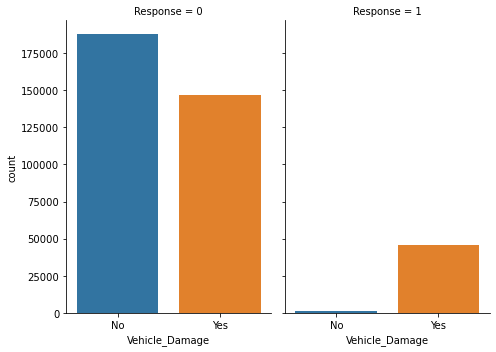

In [27]:
g=sns.catplot(x='Vehicle_Damage',y='count', col='Response',
             data=df, kind='bar', aspect=0.7)

/home/ochieng/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

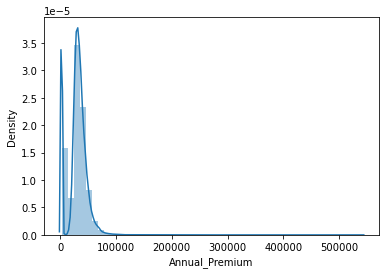

In [29]:
#Annual Premium Distribution
sns.distplot(train['Annual_Premium'])

/home/ochieng/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

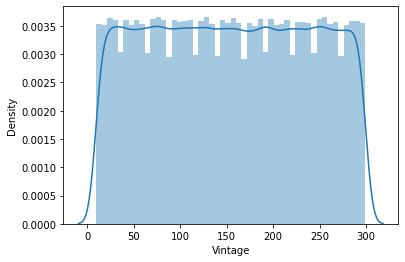

In [30]:
#Vintage
sns.distplot(train['Vintage'])

### Data Preprocessing

In [31]:
#Categorical data into numeric data
train['Gender'] = train['Gender'].replace({'Male': 1, 'Female': 0})
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [32]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [35]:
train['Vehicle_Damage'].replace({'Yes': 1,'No':0}, inplace=True)
train['Vehicle_Age'] = train['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3})
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


###### The data has been pre-processed we can now perform some operations,

<AxesSubplot:>

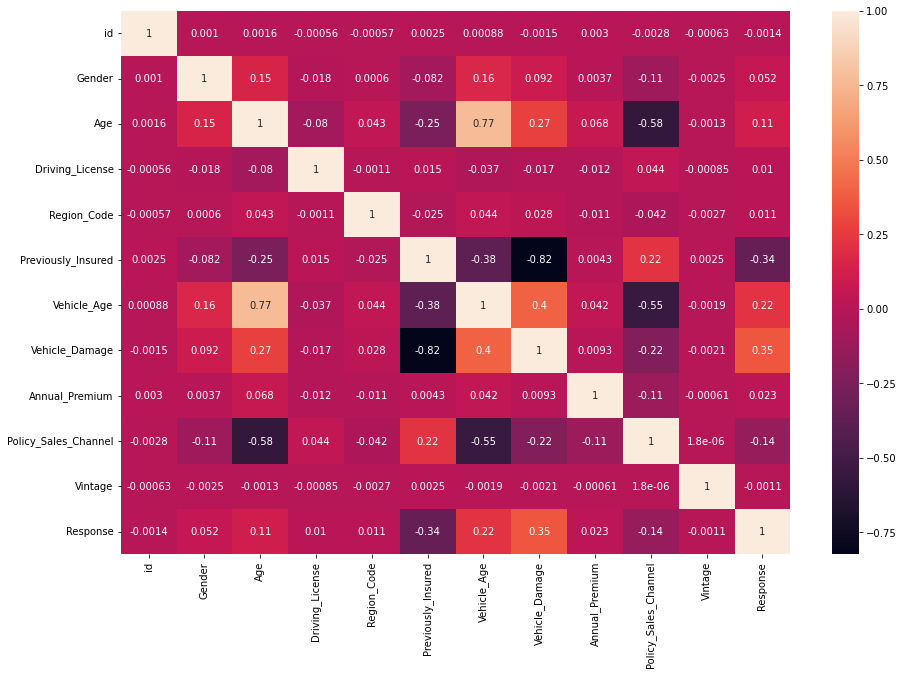

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

In [39]:
#Lets get the highly correlated columns with respect to target columns which can give us better accuracy.

hig_corr = train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >=0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

In [40]:
#Separating dependent data and independent data
X=train.drop(['Response'],axis=1)
print(X.shape)
y=train['Response']
print(y.shape)

(381109, 11)
(381109,)


In [42]:
#Separating train data into train and test(20% of the training dataset)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(304887, 11)
(76222, 11)


### Modelling

##### We are going to use Random Forest and XGBoost

In [44]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, r2_score,accuracy_score
y_pred=model.predict(X_test)

print("Classification Report is: \n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Training Score : \n", model.score(X_test, y_test)*100)
print("Mean Squared Error : \n", mean_squared_error(y_test, y_pred))
print("R2 Score is : \n",r2_score(y_test, y_pred))
print(model.get_params())
print(accuracy_score(y_test, ypred)*100)

Classification Report is: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     66846
           1       0.40      0.07      0.13      9376

    accuracy                           0.87     76222
   macro avg       0.64      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222

Confusion Matrix:
 [[65785  1061]
 [ 8680   696]]
Training Score : 
 87.22022513185169
Mean Squared Error : 
 0.12779774868148303
R2 Score is : 
 -0.18465218600360922
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
87.22022513185169


#### Random Forest classifier is;87.30

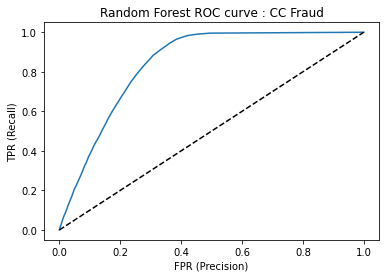

Area under curve (AUC):  0.8412549146379855


In [46]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Random Forest ROC curve : CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr, tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr, tpr))

#### Random classifier AUC is: 84.20

### XGBOOST

In [49]:
from xgboost import XGBClassifier
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print("Classfication Report is :\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Training Score : \n", model1.score(X_test, y_test)*100)
print("Mean Squared Error :\n",mean_squared_error(y_test, y_pred))
print("R2 score is: \n", r2_score(y_test,y_pred))
print(model1.get_params())
print('accuracy score', accuracy_score(y_test, y_pred)*100)

[11:22:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classfication Report is :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.45      0.02      0.04      9376

    accuracy                           0.88     76222
   macro avg       0.66      0.51      0.49     76222
weighted avg       0.83      0.88      0.82     76222

Confusion Matrix: 
 [[66582   264]
 [ 9160   216]]
Training Score : 
 87.6361155571882
Mean Squared Error :
 0.12363884442811787
R2 score is: 
 -0.14610021567580467
{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'imp

#### XGBoost classfier accuracy score is: 88

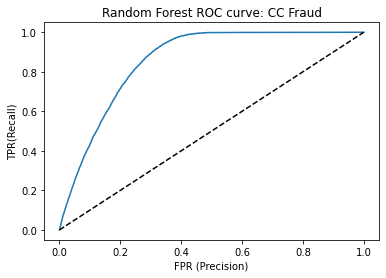

Area under curve(AUC): 0.85639062715238


In [51]:
y_score = model1.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR(Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed', color='black')
plt.show()
print('Area under curve(AUC):', auc(fpr,tpr))

##### XGBoost classifier AUC os 85.63